# Problem Statement:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.

In [145]:
# Import all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings( "ignore")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier

In [15]:
# Reading the data
data_df= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

In [16]:
# Displaying top 5 datas
data_df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [17]:
# drop the serial no column
data_df=data_df.drop('Unnamed: 0',axis=1)

In [18]:
# Displaying the top 5 datas after removing the column
data_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


## EDA

In [19]:
# Shape of the dataframe
print("Total number of rows: ",data_df.shape[0], "\n""Total number of columns: ",data_df.shape[1])

Total number of rows:  1525 
Total number of columns:  9


In [20]:
# Displaying the information of the data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [21]:
# Description of the data
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [22]:
# Checking the null values in the data
data_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [23]:
# Checking the duplicates in the data
dups=data_df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
data_df[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [24]:
# Removing the duplicates in the data
data_df.drop_duplicates(inplace=True) 
dups=data_df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))

Total no of duplicate values = 0


In [25]:
data_df['economic.cond.national'] = data_df['economic.cond.national'].astype(str)
data_df['economic.cond.household'] = data_df['economic.cond.household'].astype(str)
data_df['Blair'] = data_df['Blair'].astype(str)
data_df['Hague'] = data_df['Hague'].astype(str)
data_df['Europe'] = data_df['Europe'].astype(str)
data_df['political.knowledge'] = data_df['political.knowledge'].astype(str)

In [26]:
data_df.dtypes

vote                       object
age                         int64
economic.cond.national     object
economic.cond.household    object
Blair                      object
Hague                      object
Europe                     object
political.knowledge        object
gender                     object
dtype: object

In [27]:
data_df.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [28]:
for feature in data_df.columns:
    if data_df[feature].dtype=='object':
        print("\n",feature.upper() ,":",data_df[feature].nunique())
        print(data_df[feature].value_counts().sort_values())     


 VOTE : 2
Conservative     460
Labour          1057
Name: vote, dtype: int64

 ECONOMIC.COND.NATIONAL : 5
1     37
5     82
2    256
4    538
3    604
Name: economic.cond.national, dtype: int64

 ECONOMIC.COND.HOUSEHOLD : 5
1     65
5     92
2    280
4    435
3    645
Name: economic.cond.household, dtype: int64

 BLAIR : 5
3      1
1     97
5    152
2    434
4    833
Name: Blair, dtype: int64

 HAGUE : 5
3     37
5     73
1    233
4    557
2    617
Name: Hague, dtype: int64

 EUROPE : 11
2      77
7      86
10    101
1     109
9     111
8     111
5     123
4     126
3     128
6     207
11    338
Name: Europe, dtype: int64

 POLITICAL.KNOWLEDGE : 4
1     38
3    249
0    454
2    776
Name: political.knowledge, dtype: int64

 GENDER : 2
male      709
female    808
Name: gender, dtype: int64


### Observation:
- The data set contains 1525 rows, 9 columns .
- In the given data set there are 9 Integer type features which are all the ratings given from 1 to 5. Vote and gender is of object type where vote denotes which party the candidate voted and their corresponding genders.
- The first column is an index ("Unnamed: 0") as this only serial no, we can remove it.
- There are 8 duplicates out of 1525 as this minimal amount of error data does not affect the entire set, so we can remove it.
- There are 709 males and 808 female voters. So female has casted more votes than the male.

**Univariate Analysis**

In [29]:
# Performing the Univariant analysis
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(data_df[column].describe(),end=' ')
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.displot(data_df[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=data_df[column])
    plt.show()

In [30]:
data_df_num = data_df.select_dtypes(include = ['float64', 'int64'])
lst_num_col = list(data_df_num.columns.values)
lst_num_col

['age']

Description of age
----------------------------------------------------------------------------
count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64 Distribution of age
----------------------------------------------------------------------------


<Figure size 640x480 with 0 Axes>

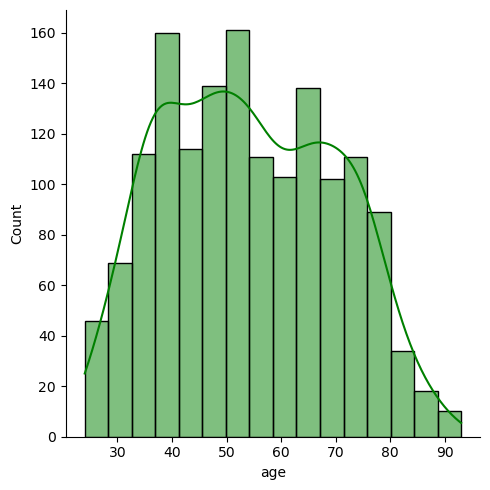

BoxPlot of age
----------------------------------------------------------------------------


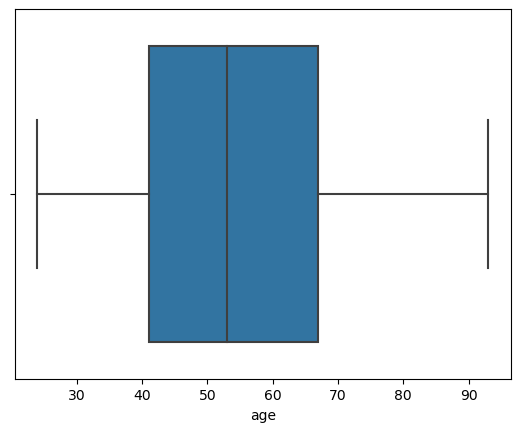

In [31]:
for x in lst_num_col:
    univariateAnalysis_numeric(x,20)

In [32]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(data_df[cat_column].value_counts())
    plt.figure()
    data_df[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [33]:
data_df_cat = data_df.select_dtypes(include = ['object'])
lst_cat_col = list(data_df_cat.columns.values)
lst_cat_col

['vote',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge',
 'gender']

Details of vote
----------------------------------------------------------------
Labour          1057
Conservative     460
Name: vote, dtype: int64


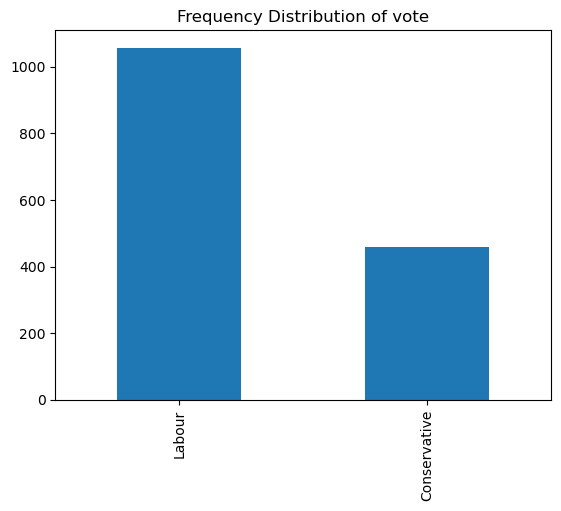

       
Details of economic.cond.national
----------------------------------------------------------------
3    604
4    538
2    256
5     82
1     37
Name: economic.cond.national, dtype: int64


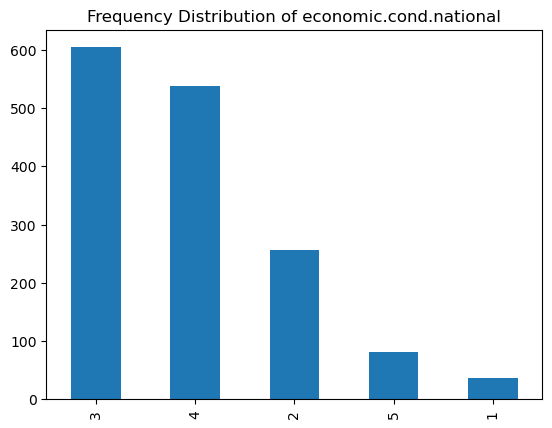

       
Details of economic.cond.household
----------------------------------------------------------------
3    645
4    435
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64


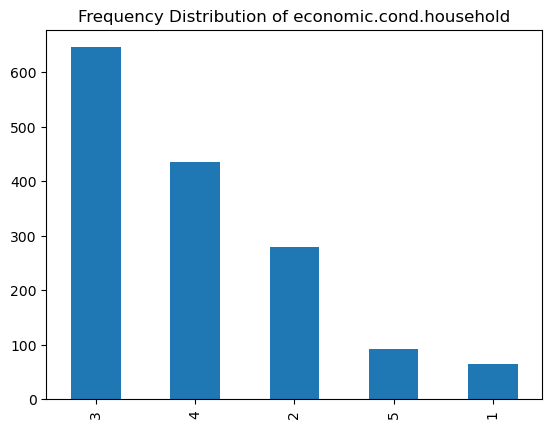

       
Details of Blair
----------------------------------------------------------------
4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64


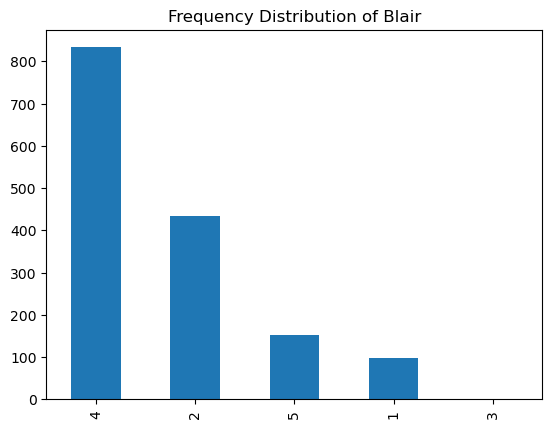

       
Details of Hague
----------------------------------------------------------------
2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64


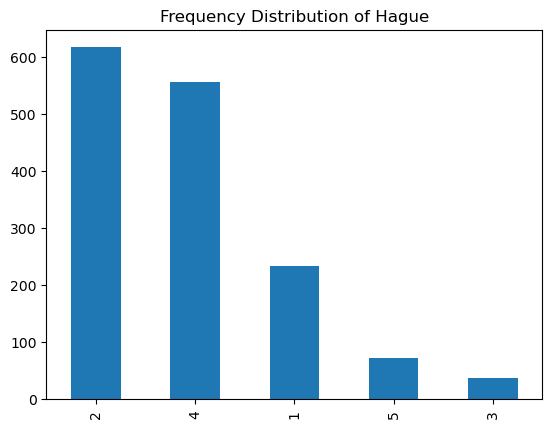

       
Details of Europe
----------------------------------------------------------------
11    338
6     207
3     128
4     126
5     123
9     111
8     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64


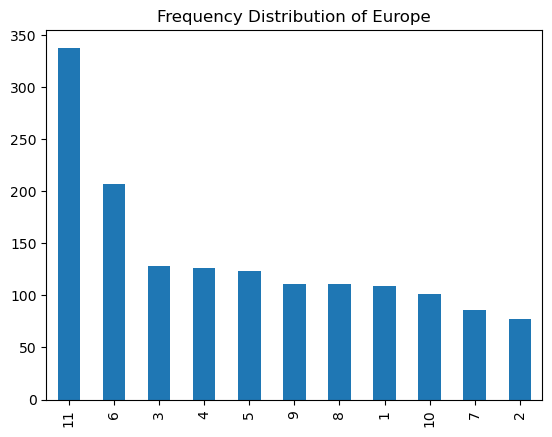

       
Details of political.knowledge
----------------------------------------------------------------
2    776
0    454
3    249
1     38
Name: political.knowledge, dtype: int64


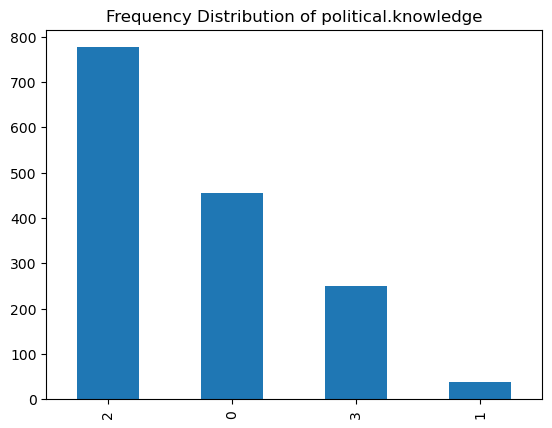

       
Details of gender
----------------------------------------------------------------
female    808
male      709
Name: gender, dtype: int64


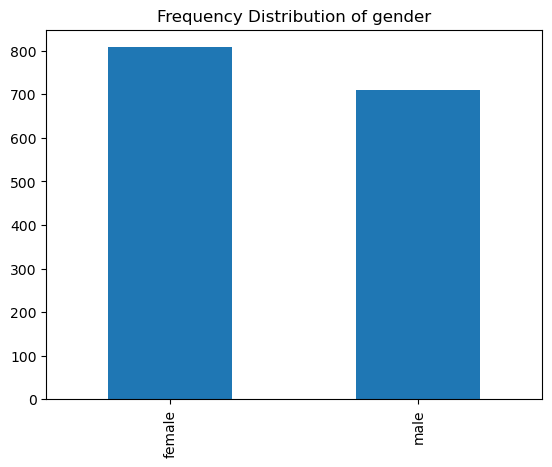

In [34]:
for x in lst_cat_col:
    univariateAnalysis_category(x)

**Bivariate Analysis**

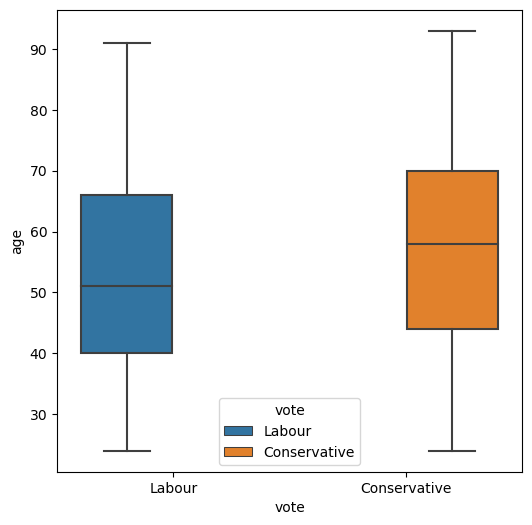

In [66]:
plt.figure(figsize=(6,6))
sns.boxplot(x=data_df["vote"],y=data_df['age'],data=data_df,hue = 'vote')
plt.show()

In [69]:
def bivariateAnalysis_category(cat_column):
    plt.figure()
    sns.countplot(data=data_df, x=cat_column, hue ='vote')
    plt.show()
    print("       ")

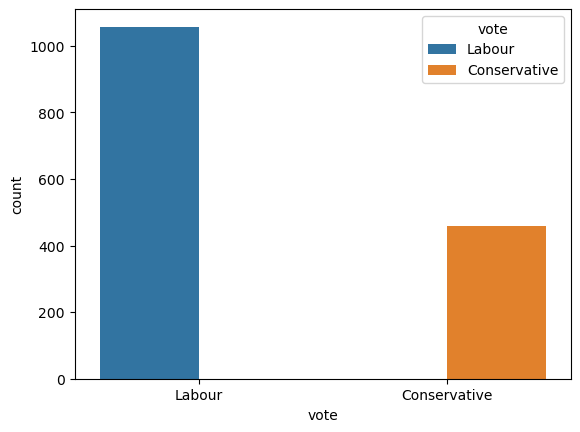

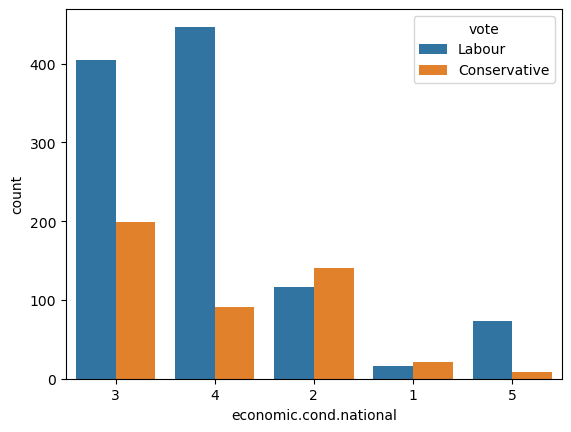

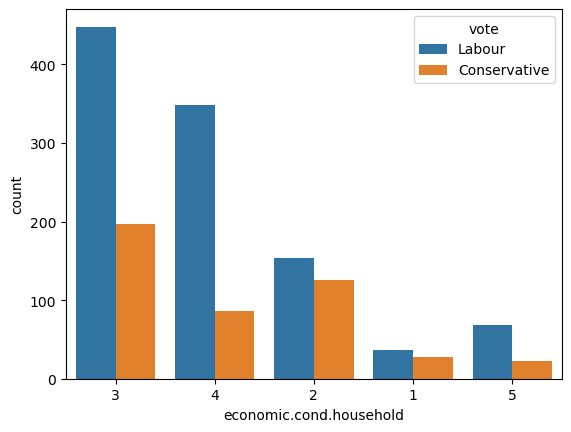

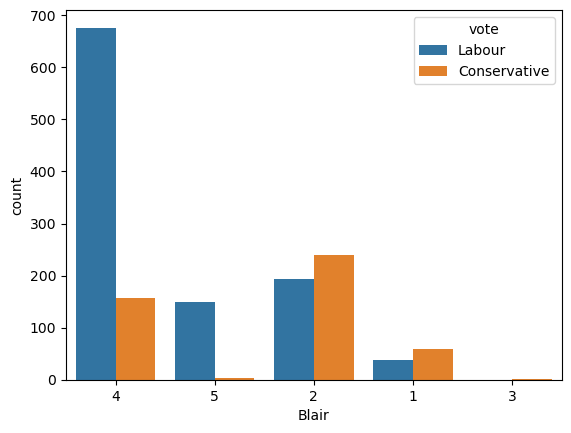

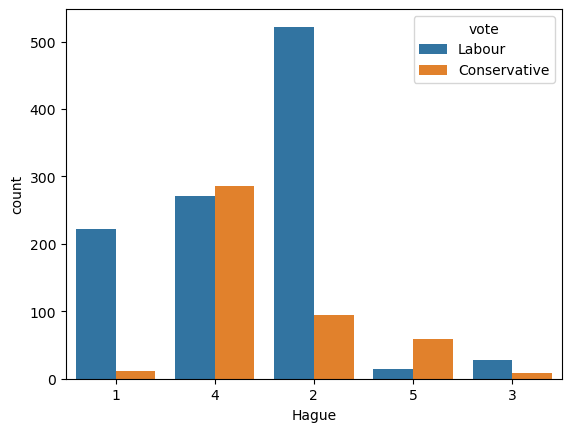

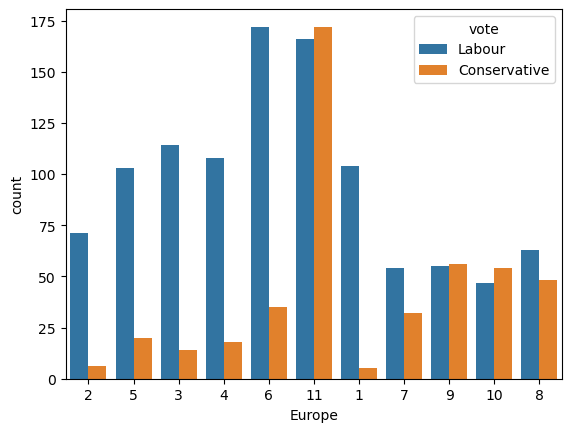

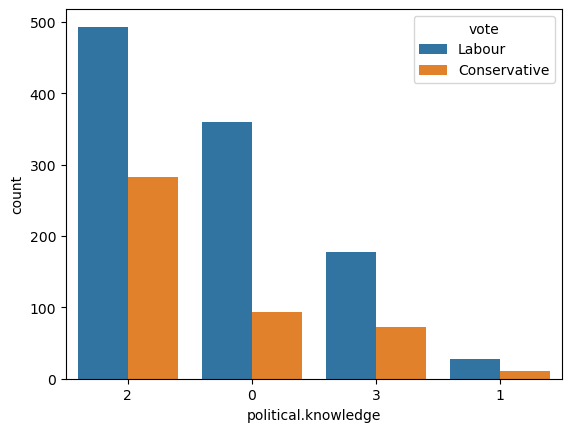

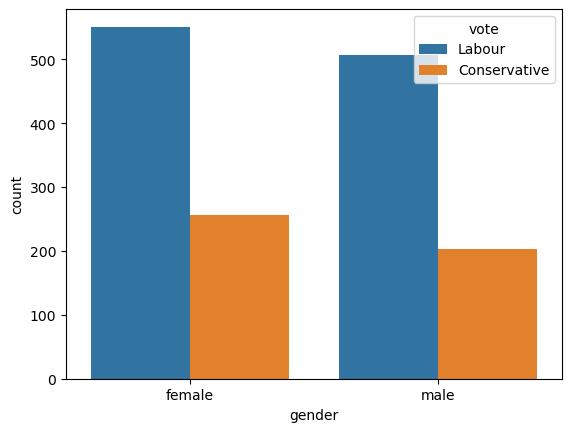

In [70]:
for x in lst_cat_col:
    bivariateAnalysis_category(x)

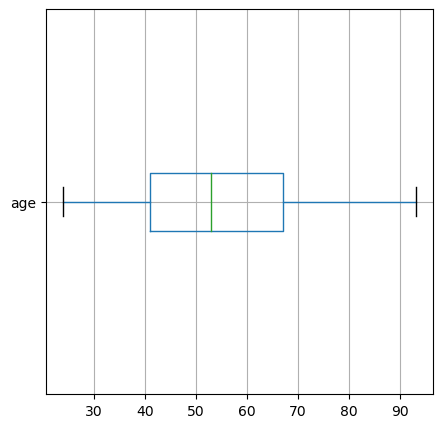

In [71]:
plt.figure(figsize=(5,5))
data_df.iloc[:,:7].boxplot(vert=0)
plt.show()

Here the scaling is  not neccesary as we the outliers are not present in the continuous variables.

In [72]:
cat1 = ['vote', 'gender']

In [73]:
df =pd.get_dummies(data_df, columns=cat1,drop_first=True)

In [74]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [75]:
df= df.rename(columns={'vote_Labour':'vote' ,'gender_male':'gender'},inplace= False)

In [76]:
df.sample(10)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote,gender
588,35,3,4,2,4,11,2,0,0
923,48,3,4,4,2,5,2,1,1
192,33,3,4,2,2,11,2,1,1
310,82,4,4,5,2,6,2,1,1
528,79,3,2,4,4,5,2,1,0
284,79,2,2,2,2,9,3,1,1
188,54,3,4,2,2,10,0,1,0
1135,38,4,4,4,4,3,0,1,0
1032,35,2,3,2,3,10,2,0,1
499,74,3,4,4,2,1,2,1,1


### Linear Discriminant Analysis

In [110]:
X=df.drop('vote',axis=1)
y=df['vote']

In [111]:
X_train,X_test, y_train, y_test=train_test_split(X,y,train_size=0.70, random_state=1)

In [112]:
X_train.shape, y_train.shape 

((1061, 8), (1061,))

In [113]:
X_test.shape, y_test.shape

((456, 8), (456,))

In [114]:
X_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
991,34,2,4,1,4,11,2,0
1274,40,4,3,4,4,6,0,1
649,61,4,3,4,4,7,2,0
677,47,3,3,4,2,11,0,1
538,44,5,3,4,2,8,0,1


In [115]:
X_test.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
504,71,3,3,2,2,8,2,0
369,43,3,2,4,2,8,3,1
1075,89,5,5,5,2,1,2,1
1031,47,2,3,2,4,8,2,0
1329,33,5,4,4,4,8,0,1


In [116]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [117]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,y_train)
print(LDA_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



#### AUC ROC curve for LDA Train

the auc 0.889 


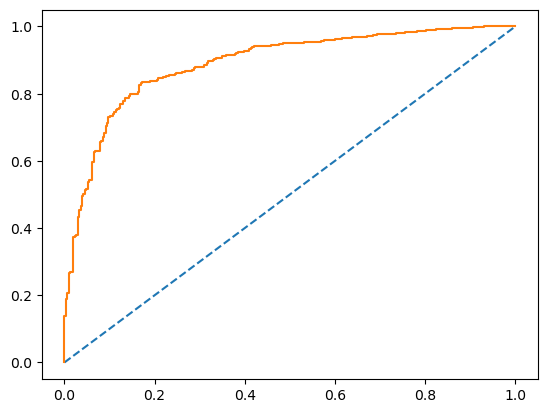

In [118]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [119]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,y_test)
print(LDA_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8333333333333334
[[111  42]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



#### AUC ROC curve for LDA Test

the auc curve 0.888 


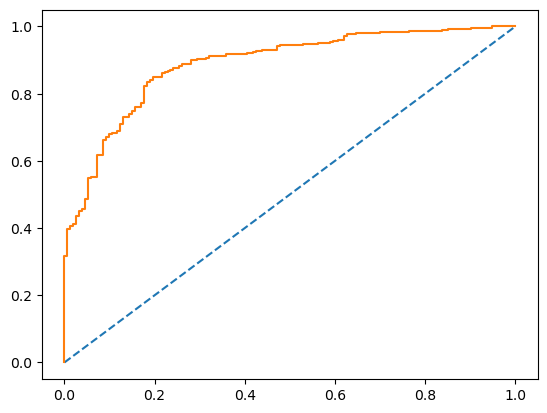

In [120]:
probs_test=LDA_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

### Logistic Regression

In [121]:
Logistic_model = LogisticRegression()
Logistic_model.fit(X_train, y_train)

LogisticRegression()

In [122]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,y_train)
print(Logistic_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8360037700282752
[[199 108]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       307
           1       0.86      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



#### AUC ROC curve for Logistic Regression Train

AUC: 0.890


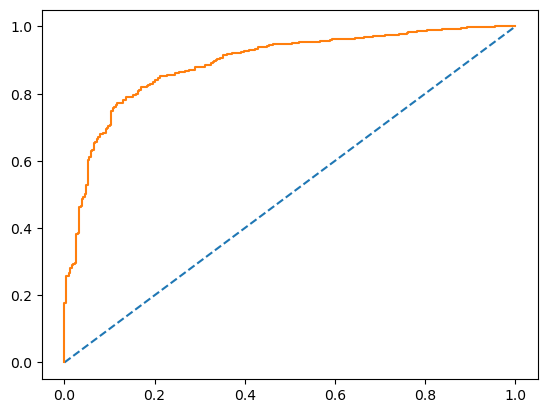

In [123]:
# predict probabilities
probs = Logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [124]:
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,y_test)
print(Logistic_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8267543859649122
[[110  43]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



In [125]:
y_test_prob=Logistic_model.predict_proba(X_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.432114,0.567886
1,0.144537,0.855463
2,0.005904,0.994096
3,0.847611,0.152389
4,0.057634,0.942366


#### AUC ROC curve for Logistic Regression Test

AUC: 0.877


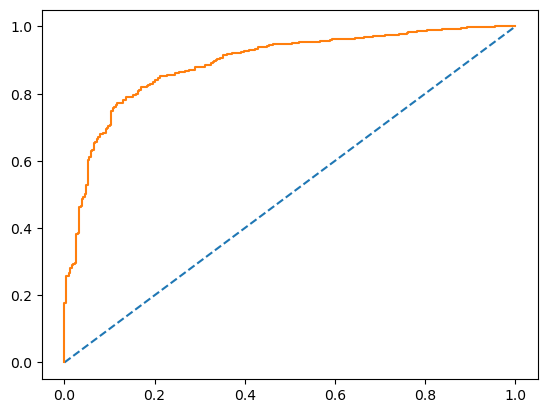

In [126]:
probs_test = Logistic_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

### Naive Bayes

In [128]:
NB_model=GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [130]:
y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))

print(metrics.classification_report(y_train,y_train_predict))

0.8350612629594723
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



the auc 0.888 


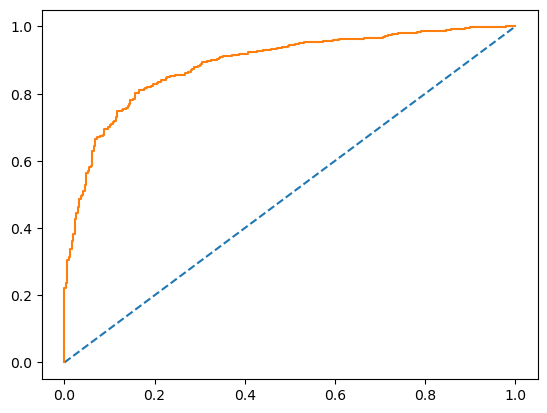

In [131]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [132]:
y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



the auc curve 0.876 


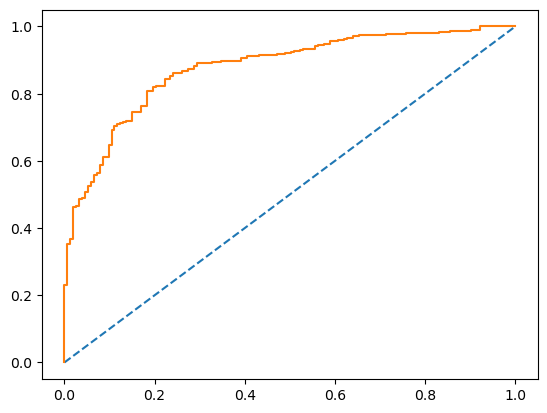

In [133]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

### KNN

In [135]:
y_train_predict=KNN_model.predict(X_train)
KNN_model_score=KNN_model.score(X_train,y_train)

In [136]:
print(KNN_model_score)

0.8557964184731386


In [137]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[209  98]
 [ 55 699]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       307
           1       0.88      0.93      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.80      0.82      1061
weighted avg       0.85      0.86      0.85      1061



#### AUC ROC Curve KNN Train

the auc 0.924 


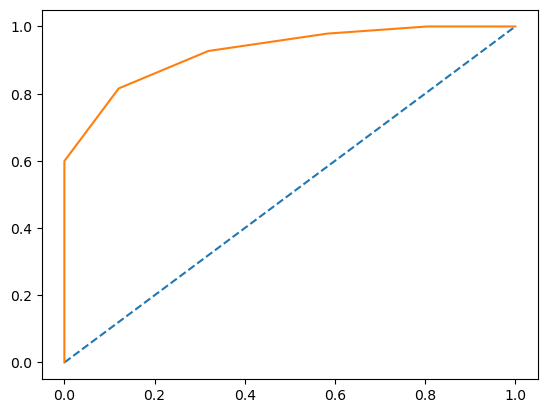

In [139]:
probs_train=KNN_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [140]:
y_test_predict=KNN_model.predict(X_test)

KNN_model_score=KNN_model.score(X_test, y_test)

print(KNN_model_score)

0.8245614035087719


In [141]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[101  52]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



#### AUC ROC Curve KNN Test

the auc curve 0.861 


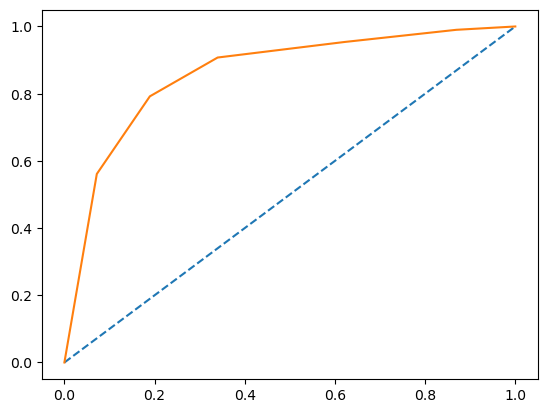

In [143]:
probs_test=KNN_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

### Bagging

In [147]:
cart=DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100, random_state=1)

Bagging_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [148]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



#### AUC _ROC Curve Bagging Train

AUC: 1.000


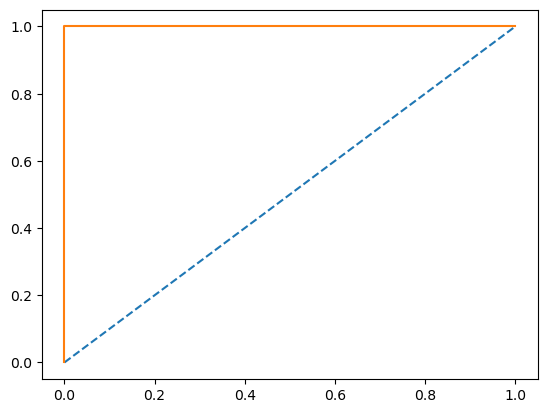

In [151]:
probs = Bagging_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

#### Bagging Test

In [152]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,y_test)
print(Bagging_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8201754385964912
[[108  45]
 [ 37 266]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



#### AUC _ROC Curve Bagging Test

AUC: 0.881


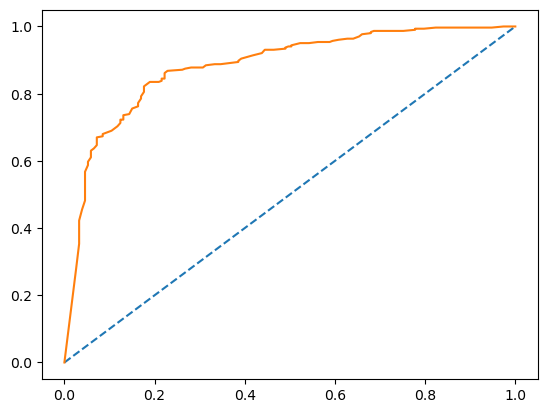

In [153]:
probs_test = Bagging_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

### Ada Boost Classifier

In [155]:
ADB_model=AdaBoostClassifier()
ADB_model.fit(X_train,y_train)

AdaBoostClassifier()

In [156]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8463713477851084
[[210  97]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       307
           1       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



AUC: 0.912


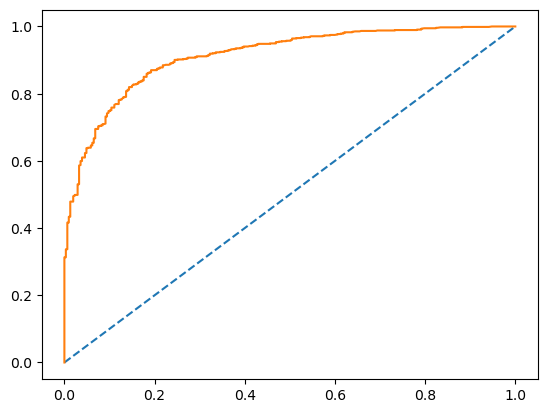

In [163]:
probs = ADB_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

#### ADA Boosting Test

In [164]:
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, y_test)
print(ADB_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[105  48]
 [ 37 266]]
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       153
           1       0.85      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



#### AUC _ROC Curve Boosting Test

AUC: 0.881


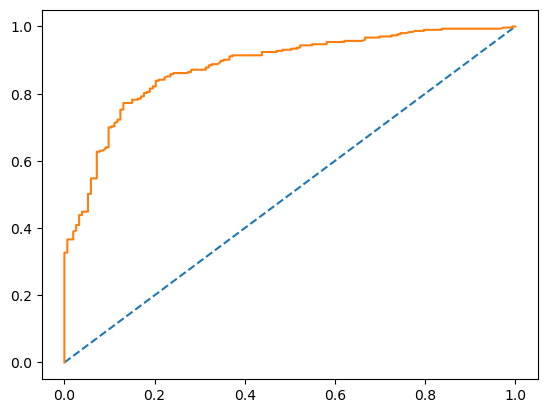

In [166]:
probs_test = ADB_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

### Gradient Boosting

In [159]:
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [160]:
y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, y_train)
print(gbc_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



#### AUC _ROC Curve Boosting Train

AUC: 0.951


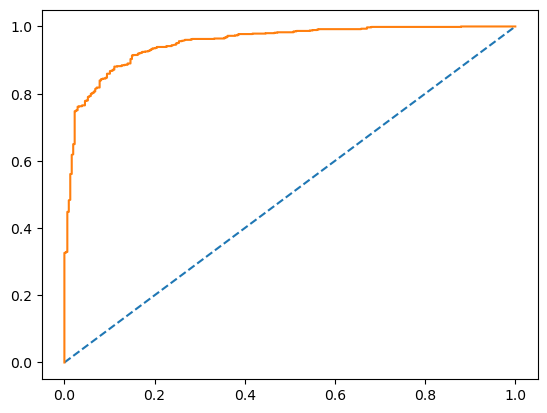

In [161]:
probs = gbc_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

#### Gradient Boosting Test

In [138]:
y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, Y_test)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8355263157894737
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



#### Gradient Boosting AUC_ROC Curve Test

AUC: 0.899


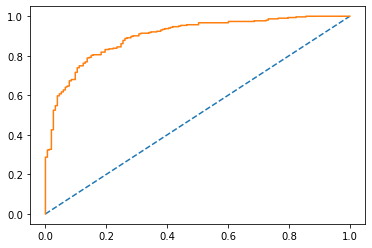

In [139]:
probs_test = gbc_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.   

Comparison of Different Models
Interest Class is 1 i.e. Heart_Att = 1

Let's look at the performance of all the models on the Train Data set and Test Data set.

Recall refers to the percentage of total relevant results correctly classified by the algorithm and hence we will compare Recall of class "1" for all models.

The model is performed well bagging train and comparatively good in bagging test data. Remaining all the data performed well in class 1 and model is set to be overfitting.

The data has been clearly mentioned through above codes and also stated clearly in word document.


## Insights

- The data set contains 1525 rows, 9 columns .
- In the given data set there are 9 Integer type features which are all the ratings given from 1 to 5. Vote and gender is of object type where vote denotes which party the candidate voted and their corresponding genders.
- There are 8 duplicates out of 1525 as this minimal amount of error data does not affect the entire set, so we can remove it.
- There are 709 males and 808 female voters. So female has casted more votes than the male and country is progressively developed and poltics were educated and equally given.
- As the outliers are not present in the continuous variables, the values does not affect the model prediction.
- The conservative party can concentrate more on advertising and preaching the political and blair to the people so tht they can perform better in the future elections.